# Pyfolio.

In [5]:
#!pip install git+https://github.com/quantopian/pyfolio

## Import packages.

In [6]:
import pandas as pd
import numpy as np
from binance.client import Client
import pyfolio as pf

import warnings
warnings.filterwarnings('ignore')

api_secret = 'vRrs2d0ykMDTbueG6ld06gL8eiXqJnHqRWwpZ5xb5UfGO8tt6bLs3OaYGXgmArYu'
api_key = 'mH4dfyAtk73b9ExEl4ggSVhDScBU4F9ucAdohY2GgFiZz2GWqhXTZMfYkis0LfV4'
client = Client(api_key, api_secret)

C:\Users\alexb\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


## Load Data.

In [85]:
try:
    symbol = 'BTCUSDT'
    time = '10 years ago'

    klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1DAY,time)

    df = pd.DataFrame(klines, columns=['Date', 'Open', 'High','Low','Close','Volume', 'None', 'None','None','None','None','None'])
    df = df.drop('None', axis=1)
    df.set_index('Date', inplace = True)
    df.index = pd.to_datetime(df.index, unit='ms')

    df['Open'] = pd.to_numeric(df['Open'], errors ='coerce')
    df['High'] = pd.to_numeric(df['High'], errors ='coerce')
    df['Low'] = pd.to_numeric(df['Low'], errors ='coerce')
    df['Close'] = pd.to_numeric(df['Close'], errors ='coerce')
    df['Volume'] = pd.to_numeric(df['Volume'], errors ='coerce')
except:
    pass

In [86]:
data = df.copy()
df = df.Close.fillna(method='ffill')

In [87]:
ret = df.pct_change().iloc[1:]

## Show Stats

Start date,2017-08-18
End date,2022-02-18
Total months,78
,Backtest
Annual return,41.022%
Cumulative returns,844.283%
Annual volatility,66.725%
Sharpe ratio,0.85
Calmar ratio,0.49
Stability,0.63
Max drawdown,-83.187%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,83.19,2017-12-16,2018-12-15,2020-11-24,767
1,53.14,2021-04-13,2021-07-20,2021-10-19,136
2,48.06,2021-11-08,2022-01-22,NaT,NaN
3,34.04,2017-09-01,2017-09-14,2017-10-12,30
4,25.17,2021-01-08,2021-01-27,2021-02-08,22


Stress Events,mean,min,max
New Normal,0.23%,-39.50%,22.50%


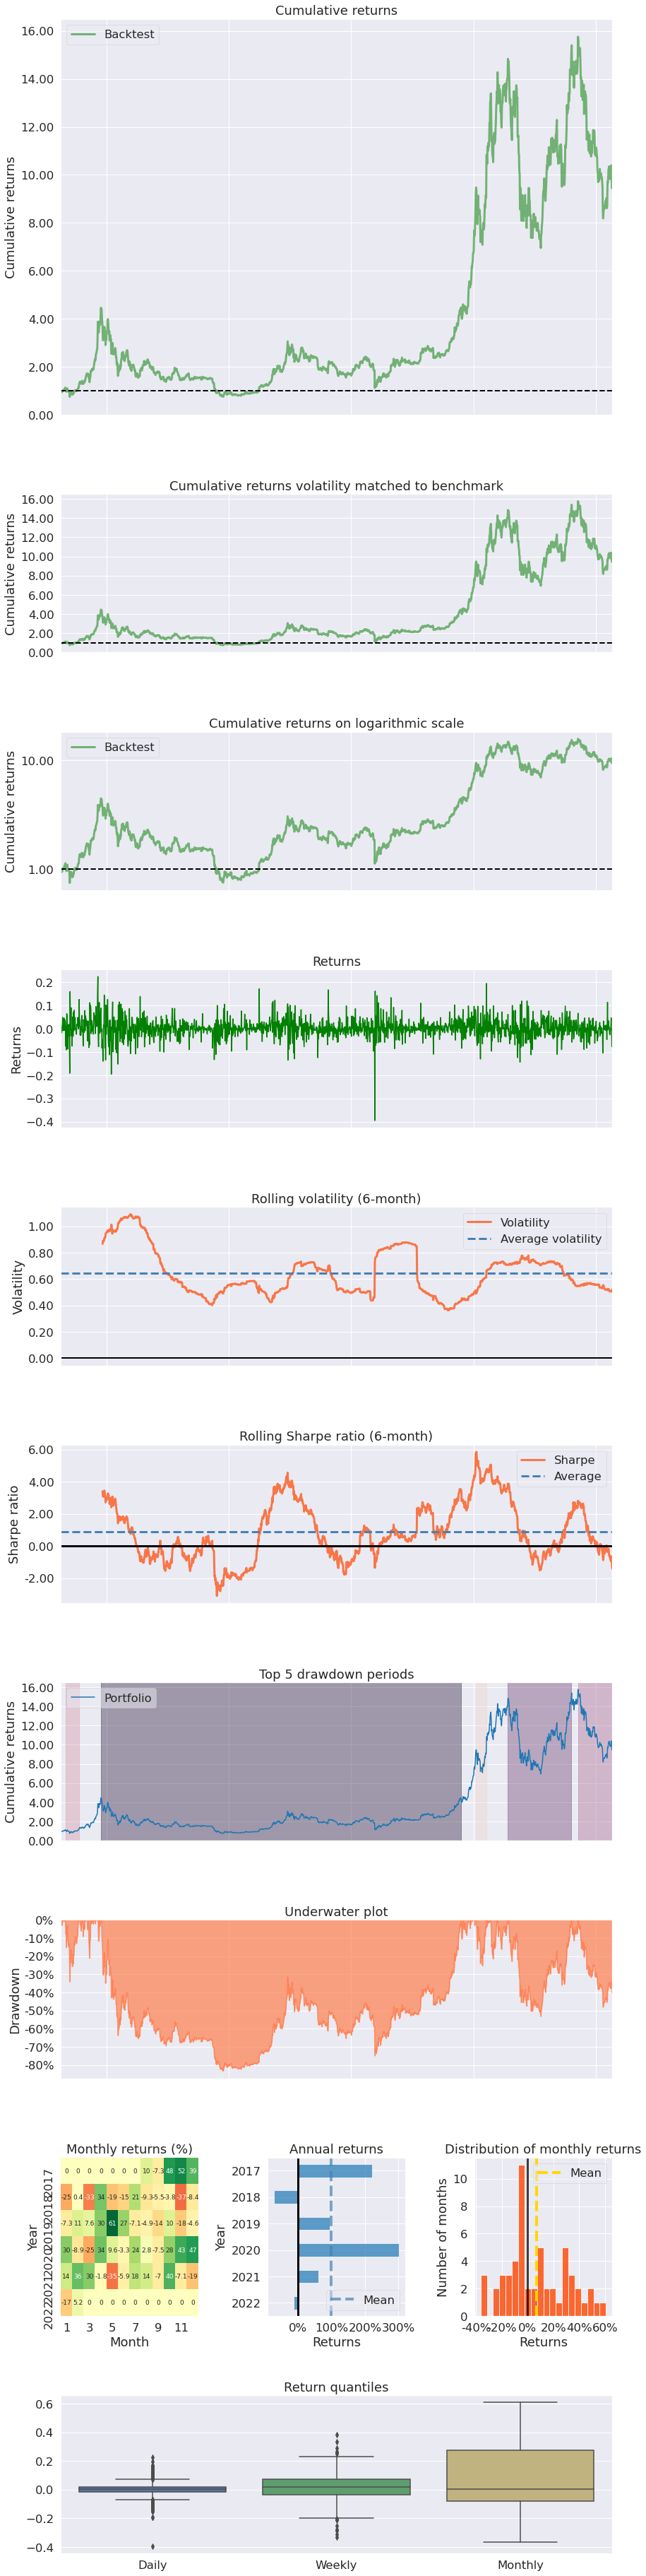

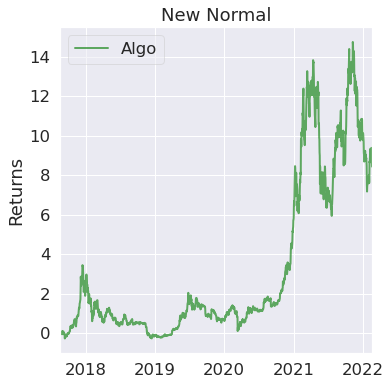

In [88]:
pf.create_full_tear_sheet(ret)